In [2]:
from pyspark import SparkContext
sc = SparkContext()

In [1]:
import matplotlib.pyplot as plt

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Chicago_crime_analysis").getOrCreate()

In [4]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

In [5]:
crimes = spark.read.csv("Crimes_-_2001_to_Present.csv",
                       header = True, 
                        schema = crimes_schema)

In [6]:
print(" The crimes dataframe has {} records".format(crimes.count()))

 The crimes dataframe has 7428804 records


In [7]:
crimes.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

In [16]:
crimes.dtypes

[('ID', 'string'),
 ('CaseNumber', 'string'),
 ('Date', 'string'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('PrimaryType', 'string'),
 ('Description', 'string'),
 ('LocationDescription', 'string'),
 ('Arrest', 'boolean'),
 ('Domestic', 'boolean'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('CommunityArea', 'string'),
 ('FBICode', 'string'),
 ('XCoordinate', 'double'),
 ('YCoordinate', 'double'),
 ('Year', 'int'),
 ('UpdatedOn', 'date'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('Location', 'string')]

In [17]:
crimes.printSchema()

root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: date (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [18]:
crimes.select("Date").show(10, truncate = False)

+----------------------+
|Date                  |
+----------------------+
|09/05/2015 01:30:00 PM|
|09/04/2015 11:30:00 AM|
|09/01/2018 12:01:00 AM|
|09/05/2015 12:45:00 PM|
|09/05/2015 01:00:00 PM|
|09/05/2015 10:55:00 AM|
|09/04/2015 06:00:00 PM|
|09/05/2015 01:00:00 PM|
|09/05/2015 11:30:00 AM|
|05/01/2016 12:25:00 AM|
+----------------------+
only showing top 10 rows



In [19]:
from datetime import datetime
from pyspark.sql.functions import col,udf
myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df = crimes.withColumn('Date_time', myfunc(col('Date'))).drop("Date")
df.select(df["Date_time"]).show(5)

+-------------------+
|          Date_time|
+-------------------+
|2015-09-05 13:30:00|
|2015-09-04 11:30:00|
|2018-09-01 00:01:00|
|2015-09-05 12:45:00|
|2015-09-05 13:00:00|
+-------------------+
only showing top 5 rows



In [138]:
df.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Lat',
 'Longitude',
 'Location',
 'date_time',
 'month']

In [20]:
crimes.select(["Latitude","Longitude","Year","XCoordinate","YCoordinate"]).describe().show()

+-------+------------------+--------------------+------------------+------------------+------------------+
|summary|          Latitude|           Longitude|              Year|       XCoordinate|       YCoordinate|
+-------+------------------+--------------------+------------------+------------------+------------------+
|  count|           7354165|             7354165|           7428804|           7354165|           7354165|
|   mean|41.842043502881815|  -87.67162901299518|2009.3644472246137|1164564.5787497289| 1885731.510358688|
| stddev|0.0888102297216899|0.061101090227819926| 5.803935915450128|16853.734354934866|32280.050624566422|
|    min|      36.619446395|       -91.686565684|              2001|               0.0|               0.0|
|    max|      42.022910333|       -87.524529378|              2021|         1205119.0|         1951622.0|
+-------+------------------+--------------------+------------------+------------------+------------------+



In [21]:
from pyspark.sql.functions import format_number
result = crimes.select(["Latitude","Longitude","Year","XCoordinate","YCoordinate"]).describe()
result.select(result['summary'],
              format_number(result['Latitude'].cast('float'),2).alias('Latitude'),
              format_number(result['Longitude'].cast('float'),2).alias('Longitude'),
              result['Year'].cast('int').alias('year'),
              format_number(result['XCoordinate'].cast('float'),2).alias('XCoordinate'),
              format_number(result['YCoordinate'].cast('float'),2).alias('YCoordinate')
             ).show()

+-------+------------+------------+-------+------------+------------+
|summary|    Latitude|   Longitude|   year| XCoordinate| YCoordinate|
+-------+------------+------------+-------+------------+------------+
|  count|7,354,165.00|7,354,165.00|7428804|7,354,165.00|7,354,165.00|
|   mean|       41.84|      -87.67|   2009|1,164,564.62|1,885,731.50|
| stddev|        0.09|        0.06|      5|   16,853.73|   32,280.05|
|    min|       36.62|      -91.69|   2001|        0.00|        0.00|
|    max|       42.02|      -87.52|   2021|1,205,119.00|1,951,622.00|
+-------+------------+------------+-------+------------+------------+



In [22]:
crimes.select("PrimaryType").distinct().count()

36

In [23]:
crimes.select("PrimaryType").distinct().show(n = 35)

+--------------------+
|         PrimaryType|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|NON-CRIMINAL (SUB...|
|               ARSON|
|   DOMESTIC VIOLENCE|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|      NON - CRIMINAL|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|           RITUALISM|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|        NON-CRIMINAL|
|       OTHER OFFENSE|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|OTHER NARCOTIC VI...|
+--------------------+
only showing top 35 rows



In [24]:
crimes.where(crimes["PrimaryType"] == "HOMICIDE").count()

11514

In [25]:
crimes.filter((crimes["PrimaryType"] == "ASSAULT") & (crimes["Domestic"] == "True")).count()

107651

In [26]:
columns = ['PrimaryType', 'Description', 'Arrest', 'Domestic']

crimes.where((crimes["PrimaryType"] == "HOMICIDE") & (crimes["Arrest"] == "true"))\
                                                        .select(columns).show(10)

+-----------+-------------------+------+--------+
|PrimaryType|        Description|Arrest|Domestic|
+-----------+-------------------+------+--------+
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|  RECKLESS HOMICIDE|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
+-----------+-------------------+------+--------+
only showing top 10 rows



In [28]:
crimes.select(columns).limit(10). show(truncate = True)

+------------------+--------------------+------+--------+
|       PrimaryType|         Description|Arrest|Domestic|
+------------------+--------------------+------+--------+
|           BATTERY|DOMESTIC BATTERY ...| false|    true|
|             THEFT|      POCKET-PICKING| false|   false|
|             THEFT|           OVER $500| false|    true|
|         NARCOTICS|POSS: HEROIN(BRN/...|  true|   false|
|           ASSAULT|              SIMPLE| false|    true|
|          BURGLARY|      FORCIBLE ENTRY| false|   false|
|          BURGLARY|      UNLAWFUL ENTRY| false|   false|
|             THEFT|        RETAIL THEFT|  true|   false|
|           ROBBERY|STRONGARM - NO WE...| false|    true|
|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...| false|   false|
+------------------+--------------------+------+--------+



In [29]:
lat_max = crimes.agg({"Latitude" : "max"}).collect()[0][0]
print("The maximum latitude values is {}".format(lat_max))

The maximum latitude values is 42.022910333


In [30]:
df = crimes.withColumn("difference_from_max_lat",lat_max - crimes["Latitude"])
df.select(["Latitude", "difference_from_max_lat"]).show(5)

+------------+-----------------------+
|    Latitude|difference_from_max_lat|
+------------+-----------------------+
|41.815117282|     0.2077930509999959|
|41.895080471|    0.12782986199999868|
|        null|                   null|
|41.937405765|     0.0855045679999975|
|41.881903443|    0.14100688999999988|
+------------+-----------------------+
only showing top 5 rows



In [31]:
df = crimes.withColumnRenamed("Latitude", "Lat")
columns = ['PrimaryType', 'Description', 'Arrest', 'Domestic','Lat']

In [32]:
df = crimes.withColumn("difference_from_max_lat",lat_max - crimes["Latitude"])
df.select(["Latitude", "difference_from_max_lat"]).show(5)

+------------+-----------------------+
|    Latitude|difference_from_max_lat|
+------------+-----------------------+
|41.815117282|     0.2077930509999959|
|41.895080471|    0.12782986199999868|
|        null|                   null|
|41.937405765|     0.0855045679999975|
|41.881903443|    0.14100688999999988|
+------------+-----------------------+
only showing top 5 rows



In [33]:
df = crimes.withColumnRenamed("Latitude", "Lat")
columns = ['PrimaryType', 'Description', 'Arrest', 'Domestic','Lat']

In [34]:
from pyspark.sql.functions import mean
df.select(mean("Lat")).alias("Mean Latitude").show()

+------------------+
|          avg(Lat)|
+------------------+
|41.842043502881815|
+------------------+



In [35]:
df.agg({"Lat":"avg"}).show()

+------------------+
|          avg(Lat)|
+------------------+
|41.842043502881815|
+------------------+



In [36]:
from pyspark.sql.functions import max,min
df.select(max("Xcoordinate"),min("Xcoordinate")).show()

+----------------+----------------+
|max(Xcoordinate)|min(Xcoordinate)|
+----------------+----------------+
|       1205119.0|             0.0|
+----------------+----------------+



In [37]:
df.filter(df["Domestic"]==True).count()/df.count() * 100

13.63060594949066

In [38]:
from pyspark.sql.functions import corr
df.select(corr("Lat","Ycoordinate")).show()

+----------------------+
|corr(Lat, Ycoordinate)|
+----------------------+
|    0.9999937661869008|
+----------------------+



In [39]:
df.groupBy("Year").count().show()
df.groupBy("Year").count().collect()

+----+------+
|Year| count|
+----+------+
|2003|475969|
|2007|437064|
|2018|268483|
|2015|264590|
|2006|448151|
|2013|307384|
|2014|275655|
|2019|260835|
|2004|469408|
|2020|211375|
|2012|336203|
|2009|392794|
|2016|269633|
|2001|485818|
|2005|453755|
|2010|370444|
|2011|351923|
|2008|427133|
|2017|268866|
|2002|486776|
+----+------+
only showing top 20 rows



[Row(Year=2003, count=475969),
 Row(Year=2007, count=437064),
 Row(Year=2018, count=268483),
 Row(Year=2015, count=264590),
 Row(Year=2006, count=448151),
 Row(Year=2013, count=307384),
 Row(Year=2014, count=275655),
 Row(Year=2019, count=260835),
 Row(Year=2004, count=469408),
 Row(Year=2020, count=211375),
 Row(Year=2012, count=336203),
 Row(Year=2009, count=392794),
 Row(Year=2016, count=269633),
 Row(Year=2001, count=485818),
 Row(Year=2005, count=453755),
 Row(Year=2010, count=370444),
 Row(Year=2011, count=351923),
 Row(Year=2008, count=427133),
 Row(Year=2017, count=268866),
 Row(Year=2002, count=486776),
 Row(Year=2021, count=166545)]

In [40]:
count = [item[1] for item in df.groupBy("Year").count().collect()]
year = [item[0] for item in df.groupBy("Year").count().collect()]
number_of_crimes_per_year = {"count":count, "year" : year}
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
number_of_crimes_per_year = pd.DataFrame(number_of_crimes_per_year)
number_of_crimes_per_year.head()

,count,year
0,475969,2003
1,437064,2007
2,268483,2018
3,264590,2015
4,448151,2006


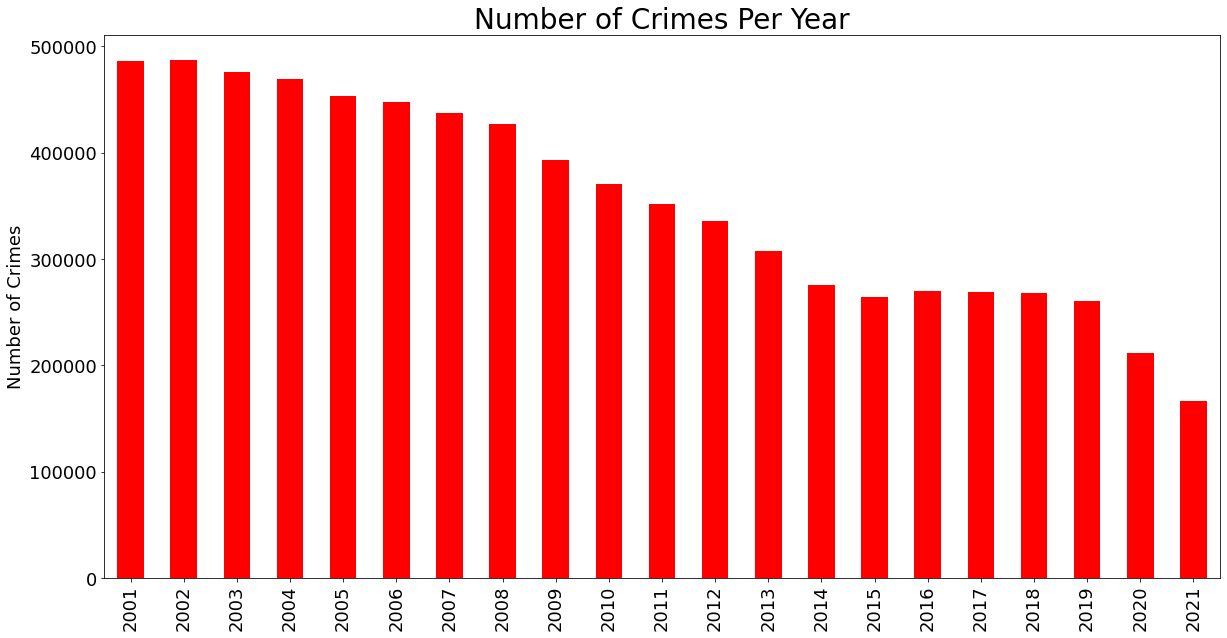

In [42]:
number_of_crimes_per_year = number_of_crimes_per_year.sort_values(by = "year")
number_of_crimes_per_year.plot(figsize = (20,10), kind = "bar", color = "red",
                               x = "year", y = "count", legend = False)
plt.xlabel("", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

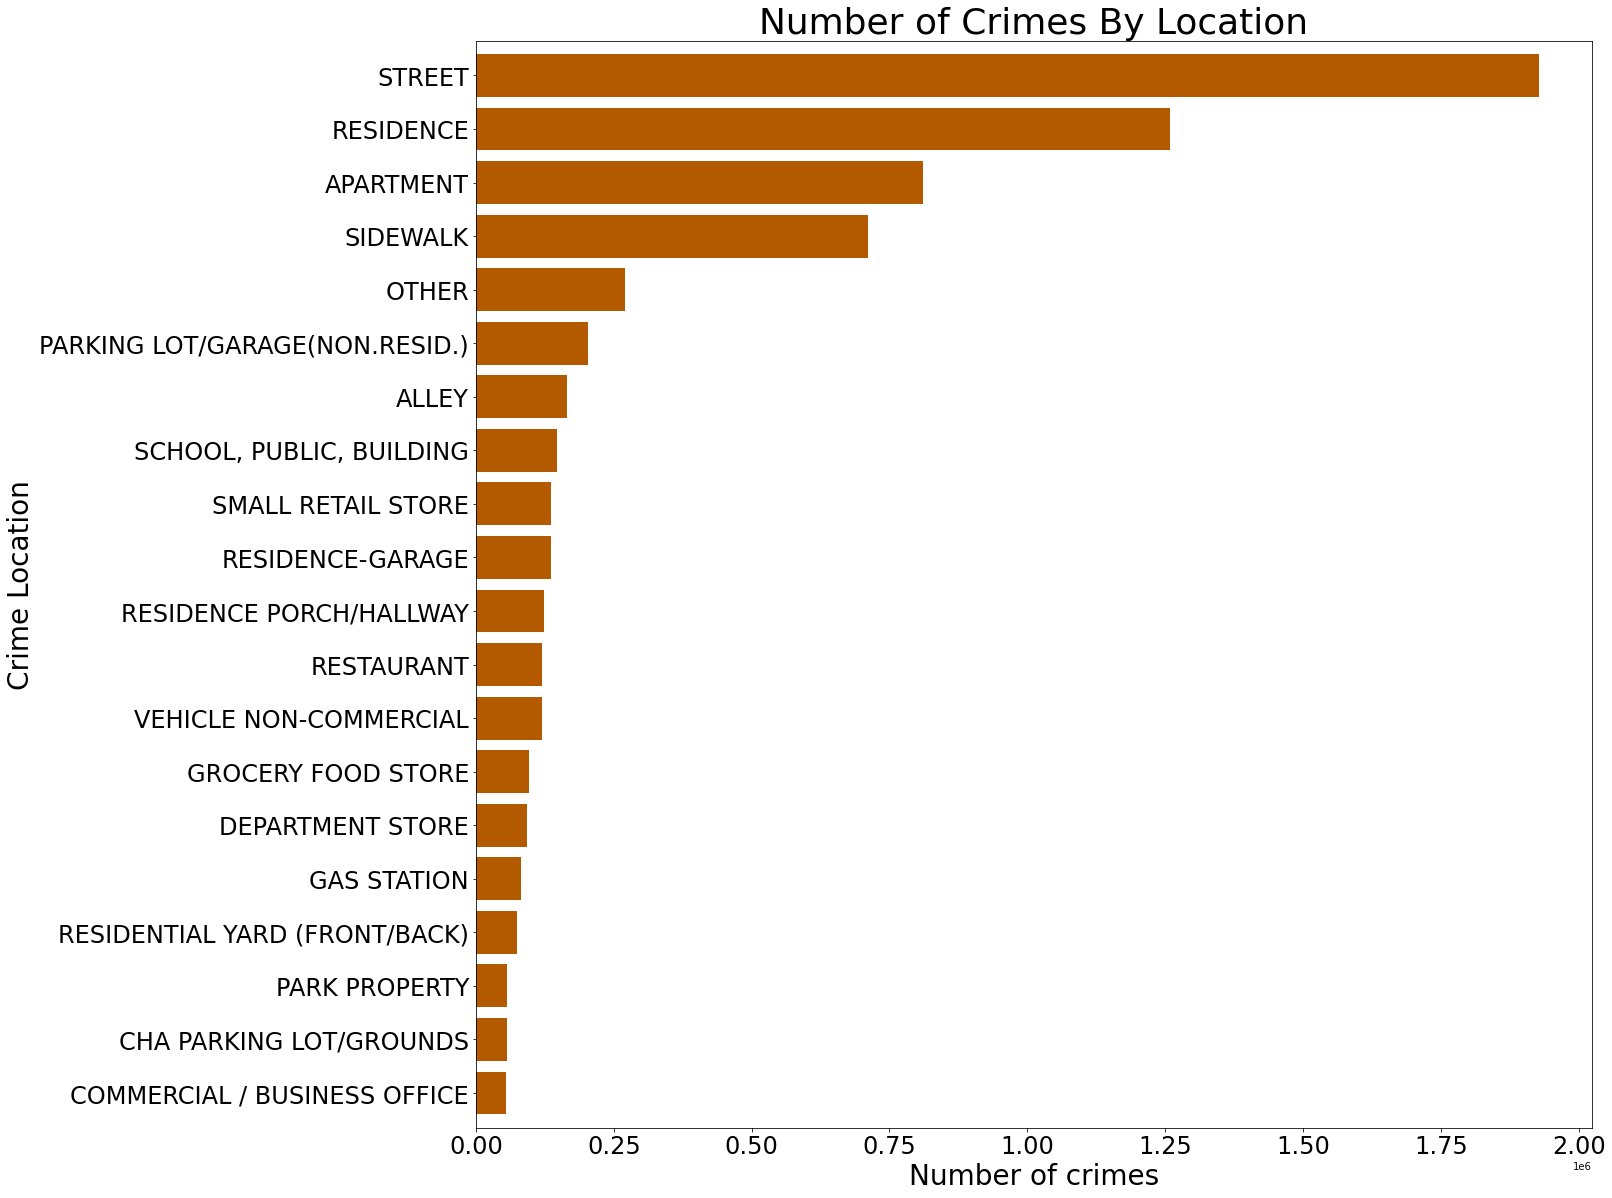

In [45]:
crime_location  = crimes.groupBy("LocationDescription").count().collect()
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
crime_location = {"location" : location, "count": count}
crime_location = pd.DataFrame(crime_location)
crime_location = crime_location.sort_values(by = "count", ascending  = False)
crime_location = crime_location.iloc[:20]
myplot = crime_location .plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "location", y = "count", legend = False)
myplot.invert_yaxis()
plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime Location", fontsize = 28)
plt.title("Number of Crimes By Location", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

In [64]:
import datetime
from pyspark.sql.functions import *

In [65]:
df.select(min('date').alias('first_record_date'), max('date').alias('latest_record_date')).show(truncate=False)

+----------------------+----------------------+
|first_record_date     |latest_record_date    |
+----------------------+----------------------+
|01/01/2001 01:00:00 AM|12/31/2020 12:55:00 AM|
+----------------------+----------------------+



In [67]:
df = df.withColumn('date_time', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'YYYY')) #adding a month column to be able to view stats on a monthly basis

In [68]:
df.select(['date','date_time', 'month'])\
  .show(n=2, truncate=False)

+----------------------+-------------------+----------+
|date                  |date_time          |month     |
+----------------------+-------------------+----------+
|09/05/2015 01:30:00 PM|2015-09-05 13:30:00|2015-01-01|
|09/04/2015 11:30:00 AM|2015-09-04 11:30:00|2015-01-01|
+----------------------+-------------------+----------+
only showing top 2 rows



In [69]:
# crime types and arrest over years:
type_arrest_date = df.groupBy(['arrest', 'month'])\
                     .count()\
                     .orderBy(['month', 'count'], ascending=[True, False])
print()
type_arrest_date.show(3, truncate=False)




+------+----------+------+
|arrest|month     |count |
+------+----------+------+
|false |2001-01-01|343894|
|true  |2001-01-01|141924|
|false |2002-01-01|345216|
+------+----------+------+
only showing top 3 rows



In [70]:


datetime.datetime.now()
datetime.datetime.strftime(datetime.datetime.now(), '%H')



'20'

In [80]:
# A pandas data frame of the collected dictionary version of the date-grouped DF above
type_arrest_pddf = pd.DataFrame(type_arrest_date.rdd.map(lambda l: l.asDict()).collect())

In [72]:
type_arrest_pddf['yearpd'] = type_arrest_pddf['month'].apply(lambda dt: datetime.datetime.strftime(pd.Timestamp(dt), '%Y'))

In [73]:
type_arrest_pddf['arrest'] = type_arrest_pddf['arrest'].apply(lambda l: l=='True')
type_arrest_pddf.head(5)

,arrest,month,count,yearpd
0,False,2001-01-01,343894,2001
1,False,2001-01-01,141924,2001
2,False,2002-01-01,345216,2002
3,False,2002-01-01,141560,2002
4,False,2003-01-01,334388,2003


/home/ssumbad/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1329: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/ssumbad/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/ssumbad/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:350: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


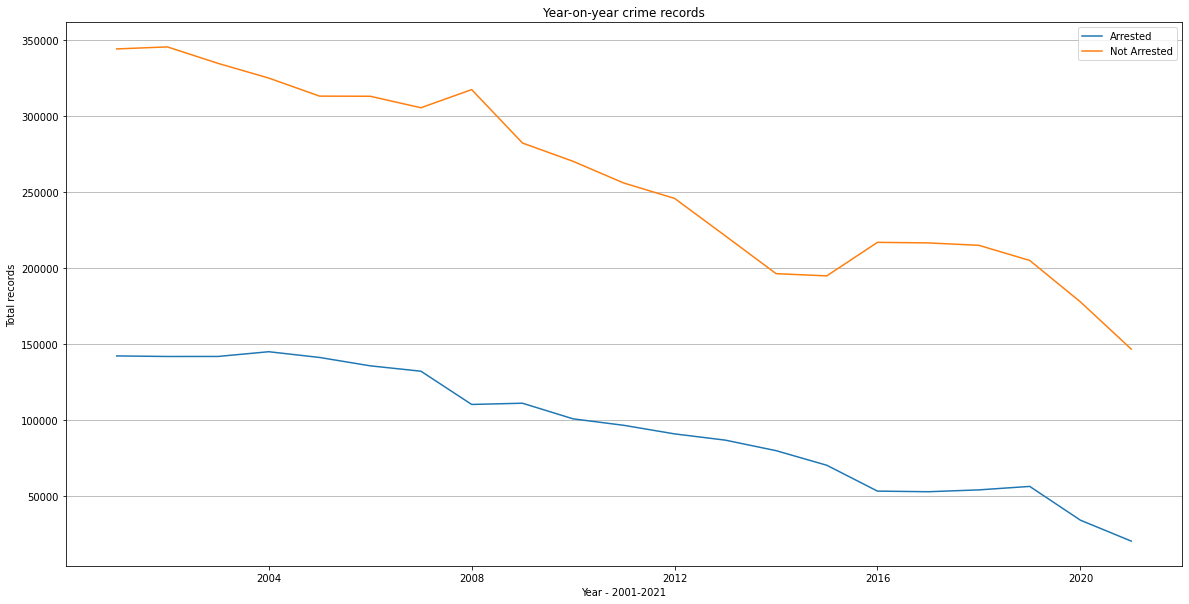

In [100]:
# Data for plotting
t = type_arrest_pddf['count'] #- 20 # np.arange(0.0, 2.0, 0.01)
s = type_arrest_pddf['month']

arrested = type_arrest_pddf[type_arrest_pddf['arrest'] == True]
not_arrested = type_arrest_pddf[type_arrest_pddf['arrest'] == False]

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(arrested['month'], arrested['count'], label='Arrested')
ax.plot(not_arrested['month'],not_arrested['count'],label='Not Arrested')

ax.set(xlabel='Year - 2001-2021', ylabel='Total records',
       title='Year-on-year crime records')
ax.grid(b=True, which='both', axis='y')
ax.legend()

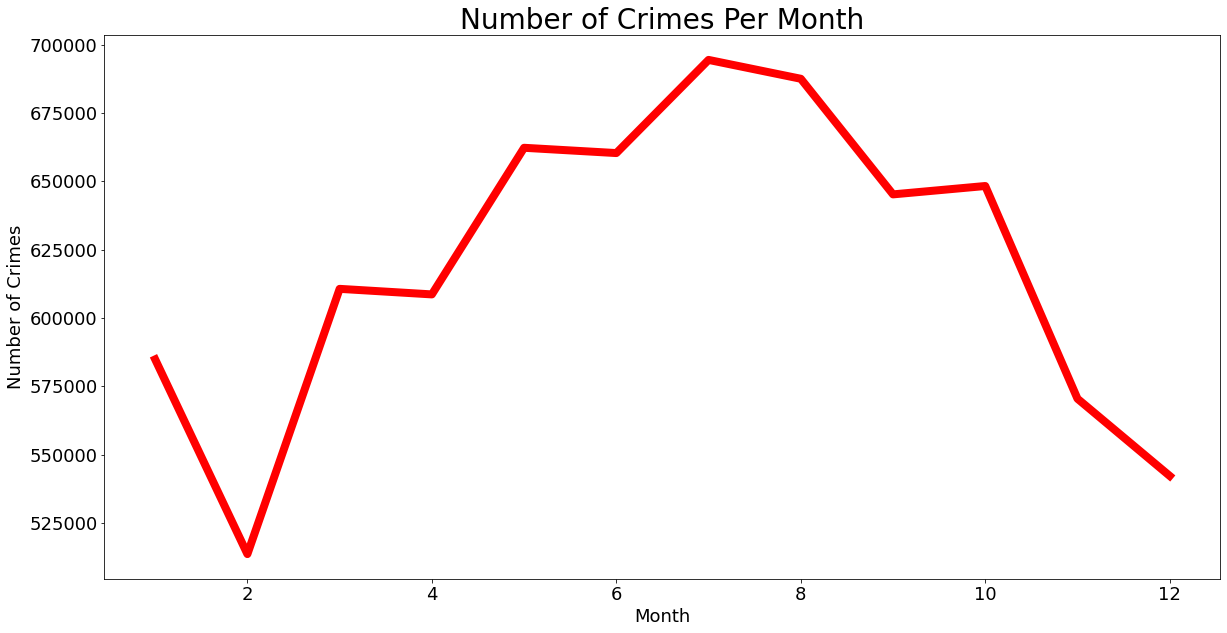

In [86]:
from pyspark.sql.functions import month
monthdf = df.withColumn("Month",month(df["Date_time"]))
monthCounts = monthdf.select("Month").groupBy("Month").count()
monthCounts = monthCounts.collect()
months = [item[0] for item in monthCounts]
count = [item[1] for item in monthCounts]
crimes_per_month = {"month":months, "crime_count": count}
crimes_per_month = pd.DataFrame(crimes_per_month)
crimes_per_month = crimes_per_month.sort_values(by = "month")
crimes_per_month.plot(figsize = (20,10), kind = "line", x = "month", y = "crime_count", 
                      color = "red", linewidth = 8, legend = False)
plt.xlabel("Month", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Month", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [88]:


# Extract the "hour" field from the date into a separate column called "hour"
df_hour = df.withColumn('hour', hour(df['date_time']))



In [92]:
# Derive a data frame with crime counts per hour of the day:
hourly_count = df_hour.groupBy(['PrimaryType', 'hour']).count().cache()
hourly_total_count = hourly_count.groupBy('hour').sum('count')

In [93]:
hourly_count_pddf = pd.DataFrame(hourly_total_count.select(hourly_total_count['hour'], hourly_total_count['sum(count)'].alias('count'))\
                                .rdd.map(lambda l: l.asDict())\
                                 .collect())

In [111]:
hourly_count_pddf = hourly_count_pddf.sort_values(by='hour')
hourly_count_pddf.head()

,hour,count
22,0,414084
2,1,235627
21,2,197938
6,3,160255
13,4,121104


In [98]:
plt.rcParams["figure.figsize"] = (20,10)

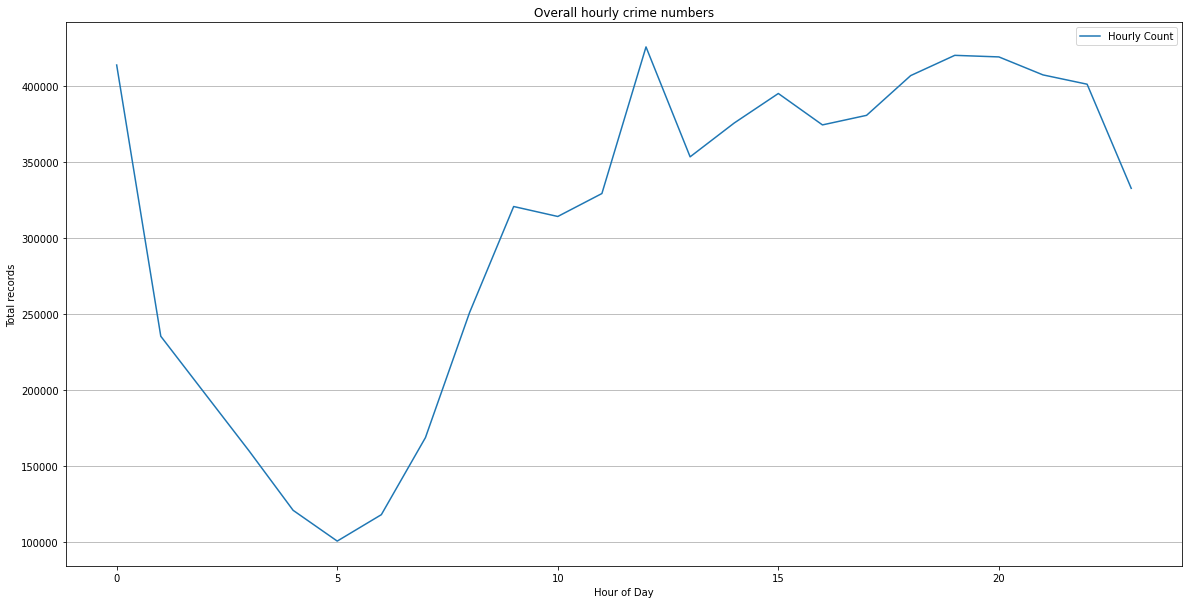

In [99]:
fig, ax = plt.subplots()
ax.plot(hourly_count_pddf['hour'], hourly_count_pddf['count'], label='Hourly Count')

ax.set(xlabel='Hour of Day', ylabel='Total records',
       title='Overall hourly crime numbers')
ax.grid(b=True, which='both', axis='y')
ax.legend()

In [105]:


# Number of types of location recorded in the dataset
df.select('LocationDescription').distinct().count()



215

In [112]:
location_hour = pd.DataFrame(df_hour.groupBy(['LocationDescription', 'hour']).count().orderBy('hour').rdd.map(lambda row: row.asDict()).collect())

In [107]:
df.groupBy(['LocationDescription']).count().orderBy('count', ascending=False).show(10)

+--------------------+-------+
| LocationDescription|  count|
+--------------------+-------+
|              STREET|1927683|
|           RESIDENCE|1259558|
|           APARTMENT| 810366|
|            SIDEWALK| 711556|
|               OTHER| 270070|
|PARKING LOT/GARAG...| 203015|
|               ALLEY| 165214|
|SCHOOL, PUBLIC, B...| 146393|
|  SMALL RETAIL STORE| 136594|
|    RESIDENCE-GARAGE| 135550|
+--------------------+-------+
only showing top 10 rows



In [133]:
df_dates = df_hour.withColumn('week_day', dayofweek(df_hour['date_time']))\
                 .withColumn('year_month', month(df_hour['date_time']))\
                 .withColumn('month_day', dayofmonth(df_hour['date_time']))\
                 .withColumn('date_number', datediff(df['date_time'], to_date(lit('2001-01-01'), format='yyyy-MM-dd')))\
                 .cache()

In [134]:
df_dates.select(['date', 'month', 'hour', 'week_day', 'year', 'year_month', 'month_day', 'date_number']).show(20, truncate=False)

+----------------------+----------+----+--------+----+----------+---------+-----------+
|date                  |month     |hour|week_day|year|year_month|month_day|date_number|
+----------------------+----------+----+--------+----+----------+---------+-----------+
|09/05/2015 01:30:00 PM|2015-01-01|13  |7       |2015|9         |5        |5360       |
|09/04/2015 11:30:00 AM|2015-01-01|11  |6       |2015|9         |4        |5359       |
|09/01/2018 12:01:00 AM|2018-01-01|0   |7       |2018|9         |1        |6452       |
|09/05/2015 12:45:00 PM|2015-01-01|12  |7       |2015|9         |5        |5360       |
|09/05/2015 01:00:00 PM|2015-01-01|13  |7       |2015|9         |5        |5360       |
|09/05/2015 10:55:00 AM|2015-01-01|10  |7       |2015|9         |5        |5360       |
|09/04/2015 06:00:00 PM|2015-01-01|18  |6       |2015|9         |4        |5359       |
|09/05/2015 01:00:00 PM|2015-01-01|13  |7       |2015|9         |5        |5360       |
|09/05/2015 11:30:00 AM|2015-01-

Refrerences
- https://www.kaggle.com/sohier/beyond-queries-exploring-the-bigquery-api
- https://datascienceplus.com/spark-dataframes-exploring-chicago-crimes/
-https://github.com/ernest-kiwele/chicago-crime-analysis-apache-spark/blob/master/spark-ml/chicago-crime-data-on-spark.ipynb
- https://github.com/RiyaJoshi/BigDataAnalysis-CrimeData/blob/master/Crime%20Analysis.ipynb
- https://www.kaggle.com/sharanbasavsumbad/query-of-chicago-crime-data-set/edit